# Abstract

# Table of contents
1. [Introduction](#introduction)
2. [Related Work](#related)
3. [Theory](#theory)

    3.1. [Conditional Copy Mechanism](#copy)
    
    3.2. [Decoder - Encoder Architecture](#decoderencoder)
    
    3.3. [Hierachical Encoder - Decoder](#hierachy)
    
4. [Concept](#concept)
5. [Experimental Setup](#experiment)
6. [Results](#results)
7. [Conclusion](#conclusion)

   [References](#references)


# 1 Introduction <a name="introduction"></a>

The expertise of machines to handle complex data already outmatches humans in many regards. In the area of Data Science, processing of named data using tools based on machine learning methods became a key component in the repertoire of most data scientists.
But while even primitive machines can handle clear and well-structured data, humans outmatched machines for longer in one important part - dealing with and handling natural language data - this subdiscipline of data sciences was arduous and slow, therefore only allowing small datasets to yield desirable results.

The fields of *natural language processing* and *natural language generation* are key to unlocking the huge amount of data locked behind the natural language barrier, using the benefits of machine learning to its fullest. While keeping the ability of machines to deal with massive data quantities way more efficiently than a human, it adds lessons learned from the human component to the machine to get more natural results.

*Natural language processing* dates back to the time of the first digital computers - a famous example is Warren Weaver, whose efforts of code decoding were mainly during World War II, but he then repurposed his skills to peacetime uses, seeing different languages as codes that could be automatically decoded by machines one day. [https://www.cs.bham.ac.uk/~pjh/sem1a5/pt1/pt1_history.html]
Natural language processing enables the machine to get the data it needs for in depth analysis out of - on first glance - unstructured languages and the possibility to learn from *human* generated text to improve itself for more natural *machine* generated text.

*Natural language generation* is a more recent technology - first mostly used in chatbots, it found its way into the toolkits of data scientists and linguists alike. From 2014 until 2017 job possibilities in natural language generation and deep learning grew from a negligible number to 41,000 jobs - a significant increase which can be linked to a higher demand in these diciplines. [https://www.gartner.com/smarterwithgartner/nueral-networks-and-modern-bi-platforms-will-evolve-data-and-analytics/]


An important use of *natural language generation* is the so called *data-to-text* generation- it is used to mimic human writing and text, based on the data a human normally would base his or her text on. The most used example in research for this is RotoWire, a webpage which contains the statistics of match outcomes of many different sports plus journalistic descriptions of the mentioned matches e.G. from NBA basketball. [https://www.rotowire.com/]


 <!-- //Data-to-text generation models have two things that need to be considered carefully: -->
This matching, existing dataset of data-to-text made by humans is a welcome basis for machine learning to teach that task to a machine. With an *encoder - decoder* system the RotoWire datasets can be "translated" into seemingly human written texts.[https://aaai.org/ojs/index.php/AAAI/article/view/4653]
An *encoder* acts as a combinational circuit in which a dataset, our match statistics, will be encoded into vector form with the corresponding algorithm while a *decoder* reverts this process, from the encoded data vector back to "human" data format, our written match description.

Designing data-to-text models gives rise to two main challenges:
1) understanding structured data and 2) generating associated descriptions. 

Referring to the work of Cl´ement Rebuffel et al. in their work *A Hierarchical Model for Data-to-Text
Generation* [https://arxiv.org/pdf/1912.10011v1.pdf] we will use the same approach to improve the most used encoder-decoder architecture [source 2 in paper http://arxiv.org/abs/1409.0473], where the data structure is firstly encoded sequentially by an encoder into a fixed-size vector represantation.
For improvements on the simple encoder-decoder we will use a hierarchial approach, which focuses on the inherent data-structure to encode, but with a classical decoder approach as found in previous works. [https://www.aclweb.org/anthology/D17-1239.pdf]

Overall following adaptions and improvements will be made: 

- The basic structure will be following a two-level architecture design by first encoding all the entities based on their elements and after that encoding the data structs on the same basis
- A Transformer encoder will be used in the data-to-text model to provide a stable encoding of each record inside an entity and each entity inside the whole data structure, observing context through the attention mechanism but unaffected by order
- An additional hierarchical attention mechanism for computing the hierarchical context will be added for feeding the decoder 


The experimental setup will be using data from the RotoWire benchmark which contains around 5000 tables with stats of basketball games with matching human made descriptions. This model will be compared to several state of the art approches using BLEU score.


# 2 Related Work <a name="related"></a>

*Data-to-Text Generation on RotoWire* is the simplest way to describe what will be done in scope of this work. There are multiple approaches to yield the most precise results from this dataset in the data-to-text generation research field. 

The first approach as described by Sam Wiseman et al. [https://arxiv.org/pdf/1707.08052v1.pdf] is based on an Encoder-decoder + conditional copy system published in 2017 and got pretty good results but lacked in accuracy.

One year later *Data-to-Text Generation with Content Selection and Planning* by Ratish Puduppully et al. [https://arxiv.org/pdf/1809.00582v2.pdf] also used data-to-text generation based on the RotoWire dataset, adding Neural Content Planning to get more accurate results. 

In 2019 Cl´ement Rebuffel et al. [https://arxiv.org/pdf/1912.10011v1.pdf] got back to the first approach of an encoder-decoder architecture but enhanced it to a Hierarchical Transformer Encoder to yield the most precise results. [https://paperswithcode.com/sota/data-to-text-generation-on-rotowire-relation]

In the following table the three different approches are being compared using BLEU scores by precision of their results.

- Encoder-decoder + conditional copy approach in the work _Challenges in Data-to-Document Generation_: **74.80%** in **2017**
- Neural Content Planning + conditional copy in the work _Data-to-Text Generation with Content Selection and Planning_: **87.47%** in **2018**
- Hierarchical Transformer Encoder + conditional copy in the work _A Hierarchical Model for Data-to-Text Generation_: **89.46%** in **2019**

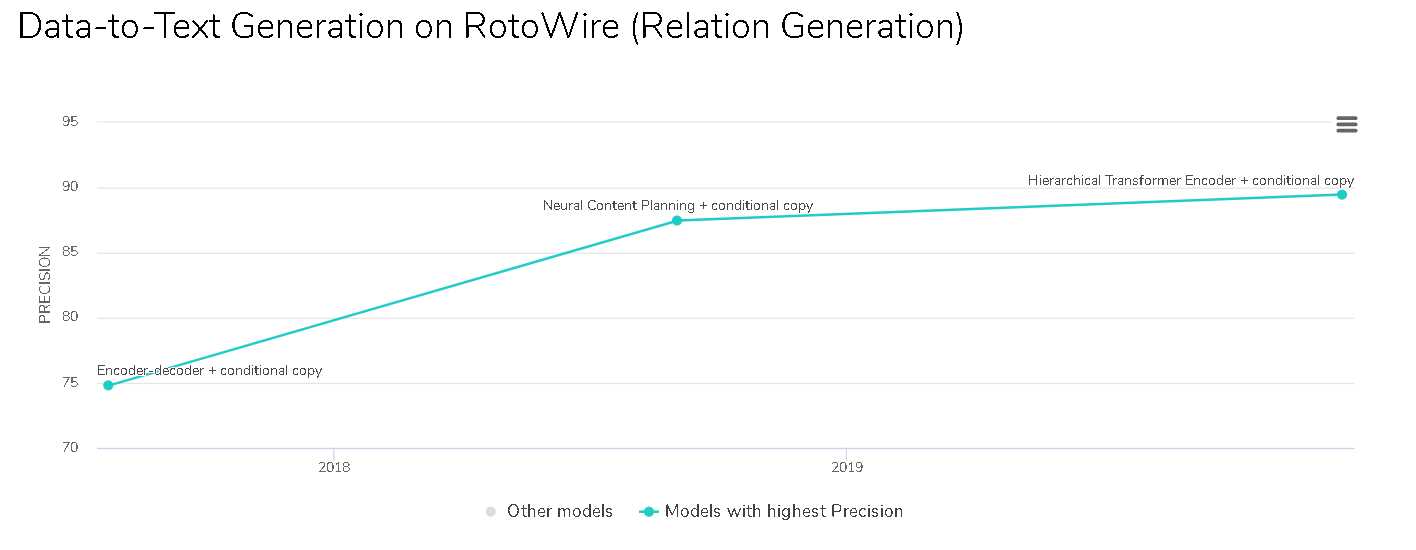

Other RotoWire independent approaches working with similar techniques are also based on a conditional copy system. *Neural Text Generation from Structured Data with Application to the Biography Domain* by Remi Lebret et al. in a work related to the Facebook AI research [https://arxiv.org/pdf/1603.07771v3.pdf] uses a copy system in a concept-to-text approach. They work with a dataset of per person statistics on wikipedia and generate a biographical text description.

Other works in data-to-text generation rely on other architectures such as T5-Base and GCN EC and many more with a good BLEU score. [https://paperswithcode.com/sota/data-to-text-generation-on-webnlg]

For our work we will use a conditional copy mechanism which proved itself as a key component for working with complex data sets with rare words that dont need translation, such as the player names in RotoWire data.

Furthermore we will rely on the same transformer encoders and hierarchical encoding system as in A Hierarchical Model for Data-to-Text Generation mentioned earlier before because it yields the best results.


# 3 Theory <a name="theory"></a>

In this section we will focus on the required technologies used for the most efficient approach to make a data-to-text system.
We will follow the techniques that Cl´ement Rebuffel et al. [https://arxiv.org/pdf/1912.10011v1.pdf] used in their work.

## 3.1 Conditional Copy Mechanism <a name="copy"></a>

The _Conditional Copy Mechanism_ is used on text input in all three mentioned papers that work with the RotoWire dataset, as does the concept-to-text approach in *Neural Text Generation from Structured Data with Application to the Biography Domain* by Remi Lebret et al. [https://arxiv.org/pdf/1603.07771v3.pdf]. It removes unnecessary encoding and decoding for text that stays the same independent of wether is used in a text field of our data structure or in plain text. In our case, player names that are repeatedly used in the match descriptions can be replaced by a pointer that references the name, offloading the learning of abstract player names that would otherwise need to be done by the following encoder network.

Caglar Gulcehre et al. used the conditional copy mechanism in their work _Pointing the Unknown Words_ [https://arxiv.org/pdf/1603.08148.pdf], calling it the pointer softmax method.

In the graphic below we can see how the conditional copy method uses its ability to prevent unnecessary encoding by identifying the words not usually found in a vocabular dictionary.

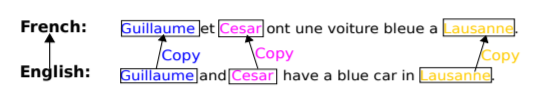

After gaining understanding of this first method we can evaluate further important machine learning techniques required for this work.

## 3.2 Encoder - Decoder Architecture <a name="decoderencoder"></a>

The origin of the Encoder - Decoder Architecture can be traced back to basic codec framework approaches, common use cases are: [https://developpaper.com/decomposing-transformer-series-i-detailed-explanation-of-encoder-decoder-model-architecture/]

- "The auto encoding of unsupervised algorithm is designed by using encoding decoding structure."

- "The application of image caption is also based on the coding decoding framework of cnn-rnn."

- "The NMT model of neural network machine translation is the encoding decoding framework of LSTM-LSTM." [quoted from same developpaper]

As mentioned above, these approaches are only example use cases of the general framework and less our exact concept, as they are constantly extended and improved by multiple techniques, in our case especially the Transformer Encoder with its attention-mechanism and the hierarchical encoding. 

Encoder-Decoder works as a _seq2seq_ (sequence to sequence) approach, which simply means that one input sequence is processed as to one output sequence, concluding a one-to-one relation. Because of the double encoding on both low- and high-level, it can be imagined as a sort of nested encoding, where the sub elements are encoded on the micro scale and the overarching data structure is encoding the encoded sub elements on the macro scale.

### Encoder - Decoder Problem
<!--I dont know what this thing really does, hard to google for it-->
An issue regarding the Encoder-Decoder Architecture is the fixed vector length of our middle vector from one item to the next, which is however only caused by the RNN solution rather than by the encoder-decoder problem itself.
The middle vector used for the encoding of context has a fixed length regardless of the input length, which is no problem for shorter sentences but for better natural language generation we need the possibility to deal with variable, longer and more complex sentences. This can also cause loss of information due to limited data storing capabilities.
While LSTM has a gating mechanism which partly deals with this issue a more specialized approach was needed.
 
### Attention Mechanism

The _Attention Mechanism_ is the best answer we have to the previous issue while working with an Encoder - Decoder framework.
It attempts to solve the issue of data loss due to compression to the length of the middle vector.
The functionality of the attention mechanism is comparable to a human scanning text while reading, only quickly skimming filler words and empty phrases, focusing on the most relevant and defining words/features of the text to comprehend the overall meaning, also for example bundling information regarding a location, so a "there" can be filled with a previously mentioned location. This allows our seq2seq approach to utilize the most relevant contextual information for his decision process.

[https://www.microsoft.com/en-us/research/publication/hierarchical-attention-networks-document-classification/]
### Vanishing Gradients Problem
One big problem of deep or recurrent networks often used in Encoder-Decoder Architectures is vanishing (or exploding) gradients. They appear when a system with many layers is trained with gradient based learning and backpropagation. Long term dependencies are iterated upon again and again until small weights create a vanishing gradient towards zero and weights above 1 create an exploding gradient. The problem comes from repeated iteration with matrices that have an eigenvalue magnitude below (or above) 1, which can be somewhat mitigated by implementing specific eigenvalue normalized matrices [https://arxiv.org/pdf/1911.07964.pdf] or long short-term memory (LSTM) RNNs. LSTMs add a memory cell and explicit gates to control information flow and have been successfully used in speech recognition and other seq2seq problems. 
[https://towardsdatascience.com/the-vanishing-gradient-problem-69bf08b15484]

## 3.3 Hierachical Encoder - Decoder <a name="hierachy"></a>

# 4 Concept <a name="concept"></a>


# 5 Experimental Setup <a name="experiment"></a>

# 6 Results <a name="results"></a>

# 7 Conclusion <a name="conclusion"></a>

# References <a name="references"></a>